# Part One: Data Exploration

In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

file_path = "https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1"

insurance = pd.read_csv(file_path)

insurance

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692
...,...,...,...,...,...,...
426,23,female,33.400,no,southwest,10795.93733
427,18,female,31.920,no,northeast,2205.98080
428,18,female,36.850,no,southeast,1629.83350
429,21,female,25.800,no,southwest,2007.94500


Fix any concerns you have about the data.

In [345]:
print(insurance.head())
print(insurance.describe(include = "all"))
print(insurance.info())

   age     sex     bmi smoker     region      charges
0   19  female  27.900    yes  southwest  16884.92400
1   33    male  22.705     no  northwest  21984.47061
2   32    male  28.880     no  northwest   3866.85520
3   31  female  25.740     no  southeast   3756.62160
4   60  female  25.840     no  northwest  28923.13692
               age     sex         bmi smoker     region       charges
count   431.000000     431  431.000000    431        431    431.000000
unique         NaN       2         NaN      2          4           NaN
top            NaN  female         NaN     no  southeast           NaN
freq           NaN     225         NaN    344        125           NaN
mean     37.960557     NaN   30.768898    NaN        NaN  12297.098118
std      16.363909     NaN    6.111362    NaN        NaN  11876.527128
min      18.000000     NaN   15.960000    NaN        NaN   1131.506600
25%      22.000000     NaN   26.357500    NaN        NaN   2710.444575
50%      34.000000     NaN   30.59000

Make up to three plots comparing the response variable (charges) to one of the predictor variables. Briefly discuss each plot.

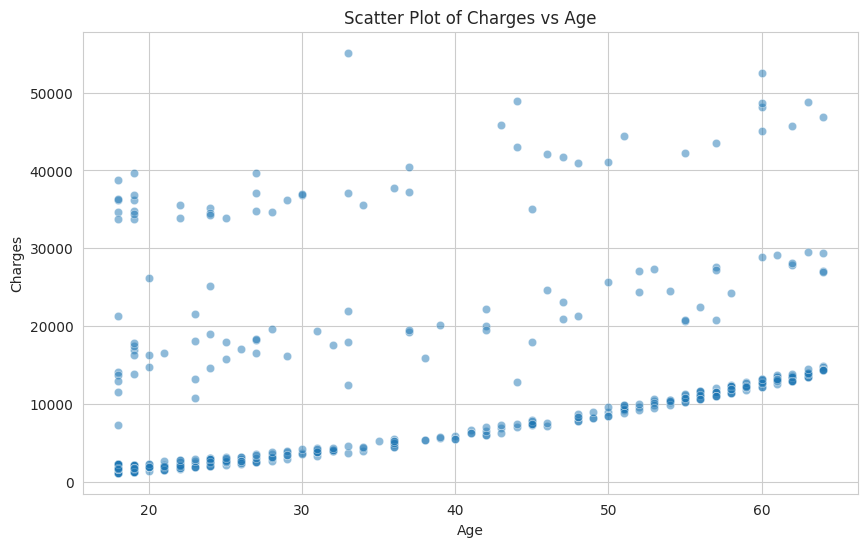

In [346]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x = "age", y = "charges", data = insurance, alpha=0.5)
plt.title("Scatter Plot of Charges vs Age")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

Discuss: Scatterplot with Linear Fit (Age vs. Charges):

Scatterplot with a linear regression line showing the relationship between age and insurance charges which typically is showing there's an increasing trend. The charges increase with age (which is commonly the case) and how well the linear fit captures this relationship.

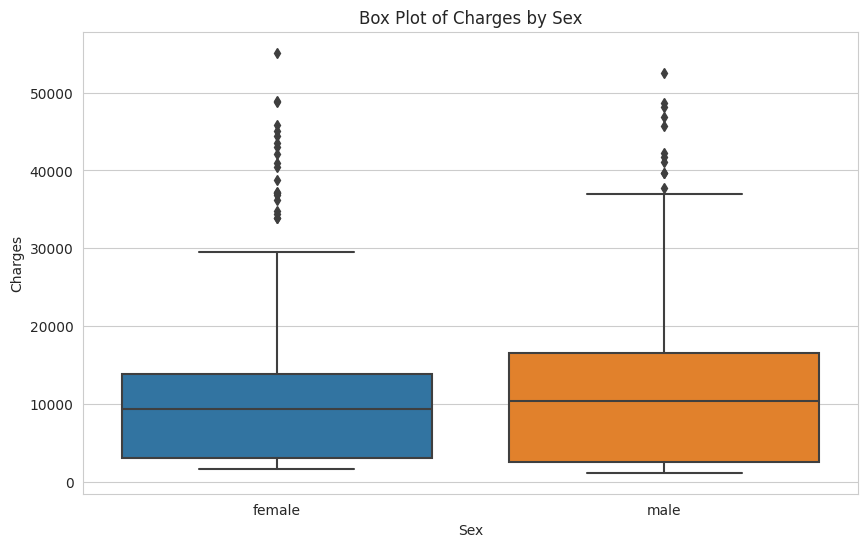

In [347]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x = "sex", y = "charges", data = insurance)
plt.title("Box Plot of Charges by Sex")
plt.xlabel("Sex")
plt.ylabel("Charges")
plt.show()

Discuss: Boxplot with Linear Fit (Sex vs. Charges):

Boxplot with a linear regression line showing the relationship between sex and insurance charges which typically is showing that its same and there are some outliers.

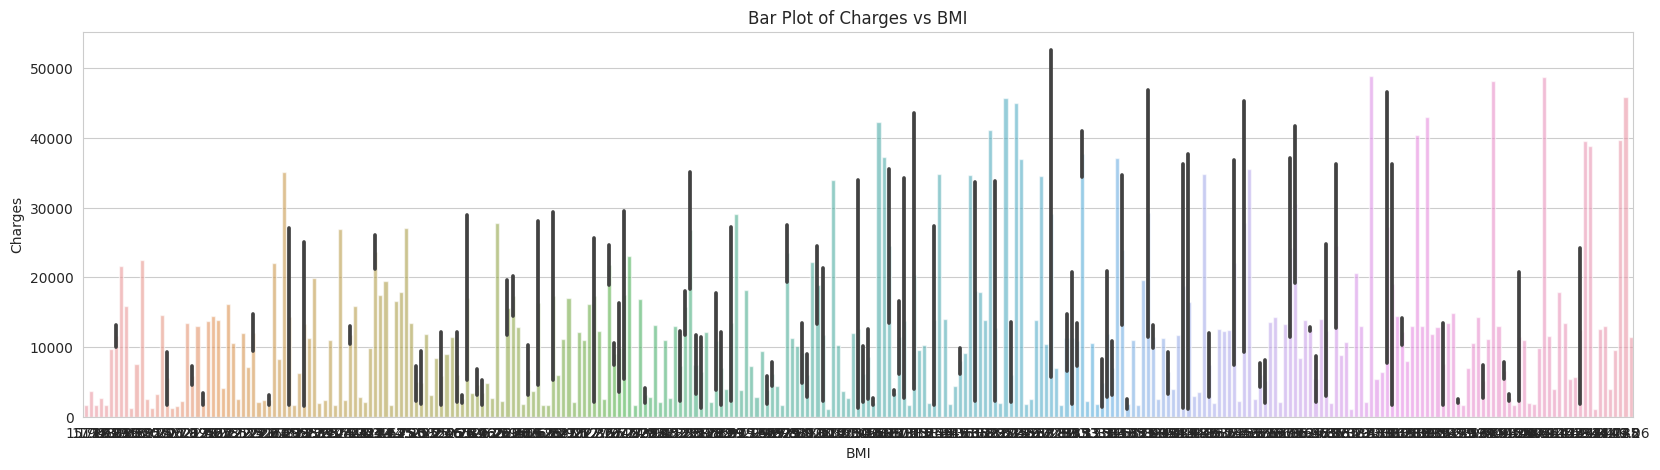

In [348]:
plt.figure(figsize=(20, 5))
sns.barplot(x = "bmi", y = "charges", data = insurance, alpha = 0.6)
plt.title("Bar Plot of Charges vs BMI")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

Discuss: Barplot with Linear Fit (BMI vs. Charges):

Barplot with a linear regression line showing the relationship between bmi and insurance charges which typically is showing there's an same trend line. The charges are increasing and decreasing  with bmi which captures this relationship.

#Part Two: Simple Linear Models
Construct a simple linear model to predict the insurance charges from the beneficiary’s age. Discuss the model fit, and interpret the coefficient estimates.

In [349]:
X_age = insurance["age"].values.reshape(-1, 1)
y_charges = insurance["charges"].values

model_age = LinearRegression()

model_age.fit(X_age, y_charges)

print(f"Coefficient (slope): {model_age.coef_[0]}")
print(f"Intercept: {model_age.intercept_}")

charges_pred_age = model_age.predict(X_age)

mse_age = mean_squared_error(y_charges, charges_pred_age)
r2_age = model_age.score(X_age, y_charges)

print(f"MSE: {mse_age}")
print(f"R-squared: {r2_age}")

Coefficient (slope): 228.79904937243666
Intercept: 3611.758798507106
MSE: 126739267.91026388
R-squared: 0.09938105452062707


Make a model that also incorporates the variable sex. Report your results.

In [350]:
categorical_features = ["sex", "smoker", "region"]
column_transformer = ColumnTransformer(
    [("encoder", OneHotEncoder(), categorical_features)],
    remainder = "passthrough"
)
data_transformed = column_transformer.fit_transform(insurance)

X = data_transformed[:, :-1]
y = data_transformed[:, -1]

model = LinearRegression()

model.fit(X, y)

charges_pred = model.predict(X)

mse_age_sex = mean_squared_error(y, charges_pred)
r2_age_sex = model.score(X, y)

print(f"MSE: {mse_age_sex}")
print(f"R-squared: {r2_age_sex}")

MSE: 30713302.113448154
R-squared: 0.781748922668639


Now make a model that does not include sex, but does include smoker. Report your results.

In [351]:
insurance_with_dummies = pd.get_dummies(insurance, drop_first=True)

X_age_smoker = insurance_with_dummies[["age", "smoker_yes"]].values
y_charges = insurance_with_dummies["charges"].values

model_age_smoker = LinearRegression()

model_age_smoker.fit(X_age_smoker, y_charges)

charges_pred_age_smoker = model_age_smoker.predict(X_age_smoker)

mse_age_smoker = mean_squared_error(y_charges, charges_pred_age_smoker)
r2_age_smoker = model_age_smoker.score(X_age_smoker, y_charges)

print(f"MSE: {mse_age_smoker}")
print(f"R-squared: {r2_age_smoker}")

MSE: 33719831.46524373
R-squared: 0.7603842948069404


Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.

In [352]:
# Comparison of MSE

print(f"MSE of model with age: {mse_age}")
print(f"MSE of model with age and sex: {mse_age_sex}")
print(f"MSE of model with age and smoker: {mse_age_smoker}")

# Comparison of R-squared

print(f"R-squared of model with age: {r2_age}")
print(f"R-squared of model with age and sex: {r2_age_sex}")
print(f"R-squared of model with age and smoker: {r2_age_smoker}")


MSE of model with age: 126739267.91026388
MSE of model with age and sex: 30713302.113448154
MSE of model with age and smoker: 33719831.46524373
R-squared of model with age: 0.09938105452062707
R-squared of model with age and sex: 0.781748922668639
R-squared of model with age and smoker: 0.7603842948069404


#Part Three: Multiple Linear Models
Now let’s consider including multiple quantitative predictors.

Fit a model that uses age and bmi as predictors. (Do not include an interaction term, age*bmi, between these two.) Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?


In [353]:
X_age_bmi = insurance_with_dummies[["age", "bmi"]].values

model_age_bmi = LinearRegression()

model_age_bmi.fit(X_age_bmi, y_charges)

charges_pred_age_bmi = model_age_bmi.predict(X_age_bmi)

mse_age_bmi = mean_squared_error(y_charges, charges_pred_age_bmi)
r2_age_bmi = model_age_bmi.score(X_age_bmi, y_charges)

print(f"MSE: {mse_age_bmi}")
print(f"R-squared: {r2_age_bmi}")

MSE: 123792439.58129103
R-squared: 0.12032144234129338


Perhaps the relationships are not linear. Fit a model that uses age and age^2 as predictors. How do the MSE and R-squared compare to the model in P2 Q1?

In [354]:
insurance_with_dummies["age_squared"] = insurance_with_dummies["age"] ** 2

X_age_age_squared = insurance_with_dummies[["age", "age_squared"]].values

model_age_age_squared = LinearRegression()

model_age_age_squared.fit(X_age_age_squared, y_charges)

charges_pred_age_age_squared = model_age_age_squared.predict(X_age_age_squared)

mse_age_age_squared = mean_squared_error(y_charges, charges_pred_age_age_squared)
r2_age_age_squared = model_age_age_squared.score(X_age_age_squared, y_charges)

print(f"MSE: {mse_age_age_squared}")
print(f"R-squared: {r2_age_age_squared}")

MSE: 126710293.80956802
R-squared: 0.09958694669946933


Fit a polynomial model of degree 4. How do the MSE and R-squared compare to the model in P2 Q1?

In [355]:
poly_features_4 = PolynomialFeatures(degree=4)

X_poly_4 = poly_features_4.fit_transform(insurance["age"].values.reshape(-1, 1))

model_poly_4 = LinearRegression()

model_poly_4.fit(X_poly_4, y_charges)

charges_pred_poly_4 = model_poly_4.predict(X_poly_4)

mse_poly_4 = mean_squared_error(y_charges, charges_pred_poly_4)
r2_poly_4 = model_poly_4.score(X_poly_4, y_charges)

print(f"MSE: {mse_poly_4}")
print(f"R-squared: {r2_poly_4}")

MSE: 125550389.64569835
R-squared: 0.1078293145318373


Fit a polynomial model of degree 12. How do the MSE and R-squared compare to the model in P2 Q1?

In [356]:
poly_features_12 = PolynomialFeatures(degree=12)

X_poly_12 = poly_features_12.fit_transform(insurance["age"].values.reshape(-1, 1))

model_poly_12 = LinearRegression()

model_poly_12.fit(X_poly_12, y_charges)

charges_pred_poly_12 = model_poly_12.predict(X_poly_12)

mse_poly_12 = mean_squared_error(y_charges, charges_pred_poly_12)
r2_poly_12 = model_poly_12.score(X_poly_12, y_charges)

print(f"MSE: {mse_poly_12}")
print(f"R-squared: {r2_poly_12}")

MSE: 125576221.30517204
R-squared: 0.10764575278101796


Plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.

MSE of model with age and bmi: 123792439.58129103
MSE of model with age and age squared: 126710293.80956802
MSE of polynomial model of degree 4: 125550389.64569835
MSE of polynomial model of degree 12: 125576221.30517204
R-squared of model with age and bmi: 0.12032144234129338
R-squared of model with age and age squared: 0.09958694669946933
R-squared of polynomial model of degree 4: 0.1078293145318373
R-squared of polynomial model of degree 12: 0.10764575278101796


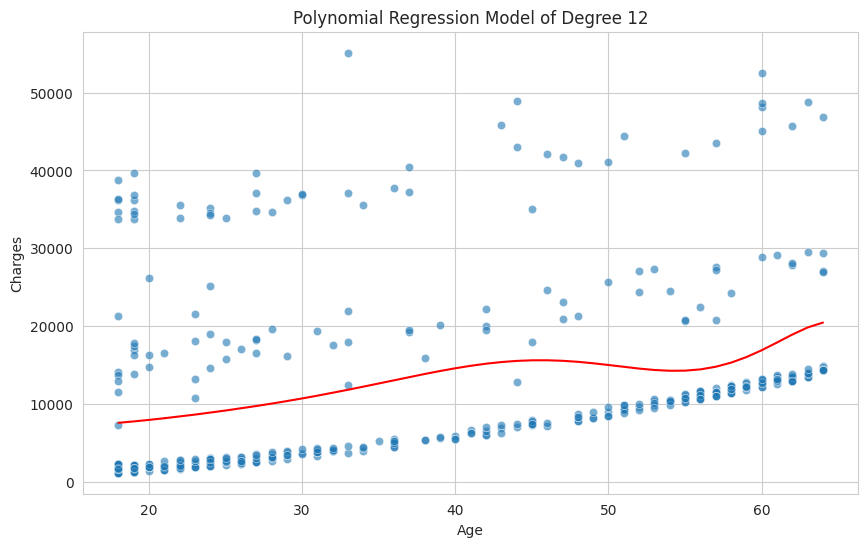

In [368]:
# Comparison of MSE
print(f"MSE of model with age and bmi: {mse_age_bmi}")
print(f"MSE of model with age and age squared: {mse_age_age_squared}")
print(f"MSE of polynomial model of degree 4: {mse_poly_4}")
print(f"MSE of polynomial model of degree 12: {mse_poly_12}")

# Comparison of R-squared
print(f"R-squared of model with age and bmi: {r2_age_bmi}")
print(f"R-squared of model with age and age squared: {r2_age_age_squared}")
print(f"R-squared of polynomial model of degree 4: {r2_poly_4}")
print(f"R-squared of polynomial model of degree 12: {r2_poly_12}")


plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data = insurance, alpha=0.6)
sorted_indices = np.argsort(insurance['age'])
plt.plot(insurance['age'].values[sorted_indices], charges_pred_poly_12[sorted_indices], color='red')
plt.title('Polynomial Regression Model of Degree 12')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


# According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?

Based on the given metrics, the model incorporating both age and BMI emerges as the superior option, evidenced by its minimal MSE and maximal \( R^2 \) values. These indicators suggest that it not only predicts with the least average error but also accounts for the largest variance in the data. Nevertheless, it is crucial to recognize that the statistical superiority of the age and BMI model does not singularly define its efficacy.

Part Four: New data



Report the MSE for each model’s new predictions. Based on this, which is the best model to use?

Make a plot showing the residuals of your final chosen model.

In [358]:
file_path = "https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1"

insurance2 = pd.read_csv(file_path)

insurance2

,age,sex,bmi,smoker,region,charges
0,23,male,34.400,no,southwest,1826.84300
1,56,male,40.300,no,southwest,10602.38500
2,18,male,34.100,no,southeast,1137.01100
3,63,female,23.085,no,northeast,14451.83515
4,63,male,28.310,no,northwest,13770.09790
...,...,...,...,...,...,...
138,19,male,34.900,yes,southwest,34828.65400
139,45,male,30.360,yes,southeast,62592.87309
140,43,male,27.800,yes,southwest,37829.72420
141,24,female,27.720,no,southeast,2464.61880


In [359]:
print(insurance2.head())
print(insurance2.describe(include = "all"))
print(insurance2.info())

   age     sex     bmi smoker     region      charges
0   23    male  34.400     no  southwest   1826.84300
1   56    male  40.300     no  southwest  10602.38500
2   18    male  34.100     no  southeast   1137.01100
3   63  female  23.085     no  northeast  14451.83515
4   63    male  28.310     no  northwest  13770.09790
               age   sex         bmi smoker     region       charges
count   143.000000   143  143.000000    143        143    143.000000
unique         NaN     2         NaN      2          4           NaN
top            NaN  male         NaN     no  northeast           NaN
freq           NaN    79         NaN    115         39           NaN
mean     39.902098   NaN   29.891434    NaN        NaN  12573.571373
std      16.624822   NaN    5.786784    NaN        NaN  12495.668607
min      18.000000   NaN   18.600000    NaN        NaN   1121.873900
25%      21.500000   NaN   25.477500    NaN        NaN   3072.870450
50%      42.000000   NaN   29.300000    NaN        NaN 

In [360]:
insurance_with_dummies = pd.get_dummies(insurance, drop_first=True)

y_charges_original = insurance_with_dummies["charges"].values

mse_results = {}

new_insurance_with_dummies = pd.get_dummies(insurance2, drop_first=True)

Consider the following possible models:

Only age as a predictor.

In [370]:
X_age = insurance_with_dummies[["age"]].values

model_age = LinearRegression()

model_age.fit(X_age, y_charges_original)



X_age_new = new_insurance_with_dummies[["age"]].values

charges_pred_age_new = model_age.predict(X_age_new)

mse_results = mean_squared_error(new_insurance_with_dummies["charges"].values, charges_pred_age_new)

print(mse_results)

136077136.50195494


age and bmi as a predictor.

In [369]:
X_age_bmi = insurance_with_dummies[["age", "bmi"]].values

model_age_bmi = LinearRegression()

model_age_bmi.fit(X_age_bmi, y_charges_original)



X_age_bmi_new = new_insurance_with_dummies[["age", "bmi"]].values

charges_pred_age_bmi_new = model_age_bmi.predict(X_age_bmi_new)

mse_results = mean_squared_error(new_insurance_with_dummies["charges"].values, charges_pred_age_bmi_new)

print(mse_results)

132636406.1108129


age, bmi, and smoker as predictors (no interaction terms)

In [363]:
X_age_bmi_smoker = insurance_with_dummies[["age", "bmi", "smoker_yes"]].values

model_age_bmi_smoker = LinearRegression()

model_age_bmi_smoker.fit(X_age_bmi_smoker, y_charges_original)



X_age_bmi_smoker_new = new_insurance_with_dummies[["age", "bmi", "smoker_yes"]].values

charges_pred_age_bmi_smoker_new = model_age_bmi_smoker.predict(X_age_bmi_smoker_new)

mse_age_bmi_smoker = mean_squared_error(new_insurance_with_dummies["charges"].values, charges_pred_age_bmi_smoker_new)

print(mse_age_bmi_smoker)

35377541.24141632


age, bmi, and smokeras predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)

In [364]:
insurance_with_dummies["age_smoker"] = insurance_with_dummies["age"] * insurance_with_dummies["smoker_yes"]
insurance_with_dummies["bmi_smoker"] = insurance_with_dummies["bmi"] * insurance_with_dummies["smoker_yes"]

X_inter = insurance_with_dummies[["age_smoker", "bmi_smoker"]].values
model_with_interaction = LinearRegression()
model_with_interaction.fit(X_inter, y_charges_original)



new_insurance_with_dummies["age_smoker"] = new_insurance_with_dummies["age"] * new_insurance_with_dummies["smoker_yes"]
new_insurance_with_dummies["bmi_smoker"] = new_insurance_with_dummies["bmi"] * new_insurance_with_dummies["smoker_yes"]

X_inter_new = new_insurance_with_dummies[["age_smoker", "bmi_smoker"]].values
charges_pred_inter_new = model_with_interaction.predict(X_inter_new)
mse_inter = mean_squared_error(new_insurance_with_dummies["charges"].values, charges_pred_inter_new)

print(mse_inter)

47626025.35814417


age, bmi, and smokeras predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)

In [365]:
X_inter_main_effects = insurance_with_dummies[["age", "bmi", "smoker_yes", "age_smoker", "bmi_smoker"]].values
model_with_interaction_and_main_effects = LinearRegression()
model_with_interaction_and_main_effects.fit(X_inter_main_effects, y_charges_original)


X_inter_main_effects_new = new_insurance_with_dummies[["age", "bmi", "smoker_yes", "age_smoker", "bmi_smoker"]].values
charges_pred_inter_main_effects_new = model_with_interaction_and_main_effects.predict(X_inter_main_effects_new)
mse_inter_main_effects = mean_squared_error(new_insurance_with_dummies["charges"].values, charges_pred_inter_main_effects_new)

print(mse_inter_main_effects)

21786256.86685252


Report the MSE for each model’s new predictions. Based on this, which is the best model to use?

Make a plot showing the residuals of your final chosen model.

Best model: age_bmi_inter_smoker with MSE: 21786256.86685252


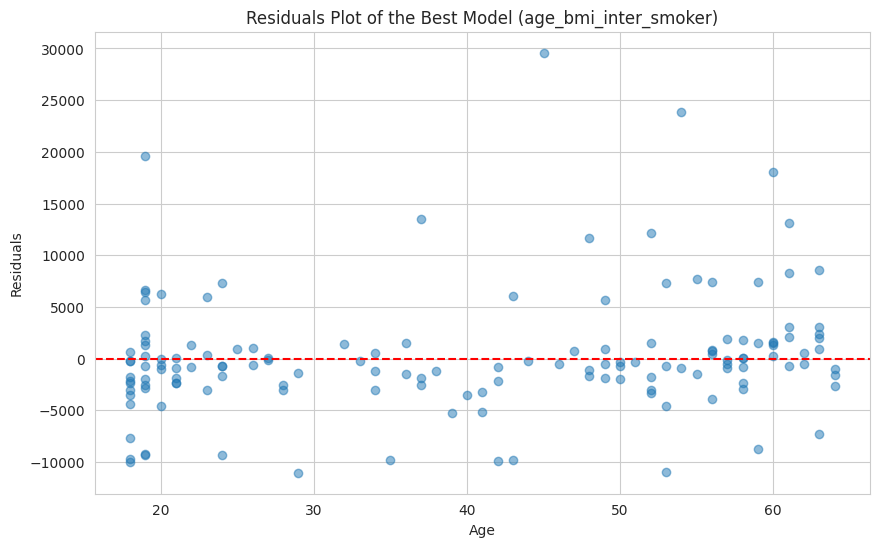

In [366]:
models_mse = {
    "age": mse_age,
    "age_bmi": mse_age_bmi,
    "age_bmi_smoker": mse_age_bmi_smoker,
    "age_bmi_inter_smoker": mse_inter_main_effects
}
best_model_key = min(models_mse, key=models_mse.get)
best_model_mse = models_mse[best_model_key]

print(f"Best model: {best_model_key} with MSE: {best_model_mse}")

best_model_pred = locals()[f"charges_pred_{best_model_key}_new"]
residuals = new_insurance_with_dummies["charges"] - best_model_pred
plt.figure(figsize=(10, 6))
plt.scatter(new_insurance_with_dummies["age"], residuals, alpha=0.5)
plt.title(f"Residuals Plot of the Best Model ({best_model_key})")
plt.xlabel("Age")
plt.ylabel("Residuals")
plt.axhline(y=0, color = "r", linestyle = "--")
plt.show()

# Part Five: Full Exploration

Using any variables in this dataset, and any polynomial of those variables, find the model that best predicts on the new data after being fit on the original data.


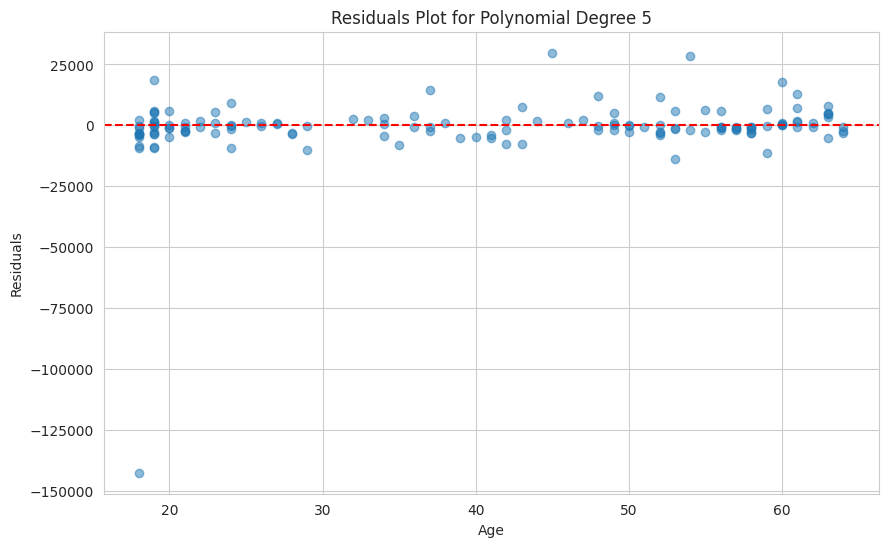

MSE for Polynomial 5: 179135239.81628126


In [367]:
best_poly_model = 5

poly = PolynomialFeatures(best_poly_model, include_bias=False)

X_poly = poly.fit_transform(insurance_with_dummies[['age', 'bmi']])


X_poly_smoker = np.column_stack((X_poly, insurance_with_dummies['smoker_yes']))

model = LinearRegression()
model.fit(X_poly_smoker, y_charges_original)

X_poly_new = poly.transform(new_insurance_with_dummies[['age', 'bmi']])
X_poly_smoker_new = np.column_stack((X_poly_new, new_insurance_with_dummies['smoker_yes']))
predictions = model.predict(X_poly_smoker_new)

residuals = new_insurance_with_dummies['charges'] - predictions

plt.figure(figsize=(10, 6))
plt.scatter(new_insurance_with_dummies['age'], residuals, alpha=0.5)
plt.title(f'Residuals Plot for Polynomial Degree {best_poly_model}')
plt.xlabel('Age')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


mse = mean_squared_error(new_insurance_with_dummies["charges"], predictions)

print(f"MSE for Polynomial {best_poly_model}: {mse}")
